In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_excel('data - pld (t+12) 2 - pre processamento.xlsx')

df.head(5)

,date,pld (t+12),ena,reservatorios SE,termica
0,2013-08-01,709.53,114.4,55.13,4268.2
1,2013-09-01,728.95,102.7,48.69,3795.0
2,2013-10-01,776.88,120.2,45.07,3825.9
3,2013-11-01,804.54,89.0,41.63,3852.9
4,2013-12-01,601.21,103.2,43.01,3490.6


In [3]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index, format='%Y-%M-%D')
df.index = df.index.to_period('M')

df.head(5)

,pld (t+12),ena,reservatorios SE,termica
date,,,,
2013-08,709.53,114.4,55.13,4268.2
2013-09,728.95,102.7,48.69,3795.0
2013-10,776.88,120.2,45.07,3825.9
2013-11,804.54,89.0,41.63,3852.9
2013-12,601.21,103.2,43.01,3490.6


<AxesSubplot:xlabel='date'>

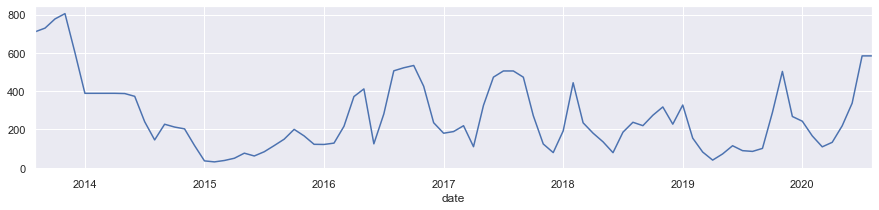

In [4]:
df['pld (t+12)'].plot(figsize = (15,3))

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = pd.DataFrame()
X = df.drop(['pld (t+12)'], axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

            feature        VIF
0               ena  18.926504
1  reservatorios SE  11.404233
2           termica   7.948921


# Normalização

In [6]:
pld = df['pld (t+12)']
ena = df['ena']
res = df['reservatorios SE']
ter = df['termica']

In [7]:
pld_avg, pld_dev = pld.mean(), pld.std()
ena_avg, ena_dev = ena.mean(), ena.std()
res_avg, res_dev = res.mean(), res.std()
ter_avg, ter_dev = ter.mean(), ter.std()

<AxesSubplot:title={'center':'Geração Térmica [GWh]'}, xlabel='date'>

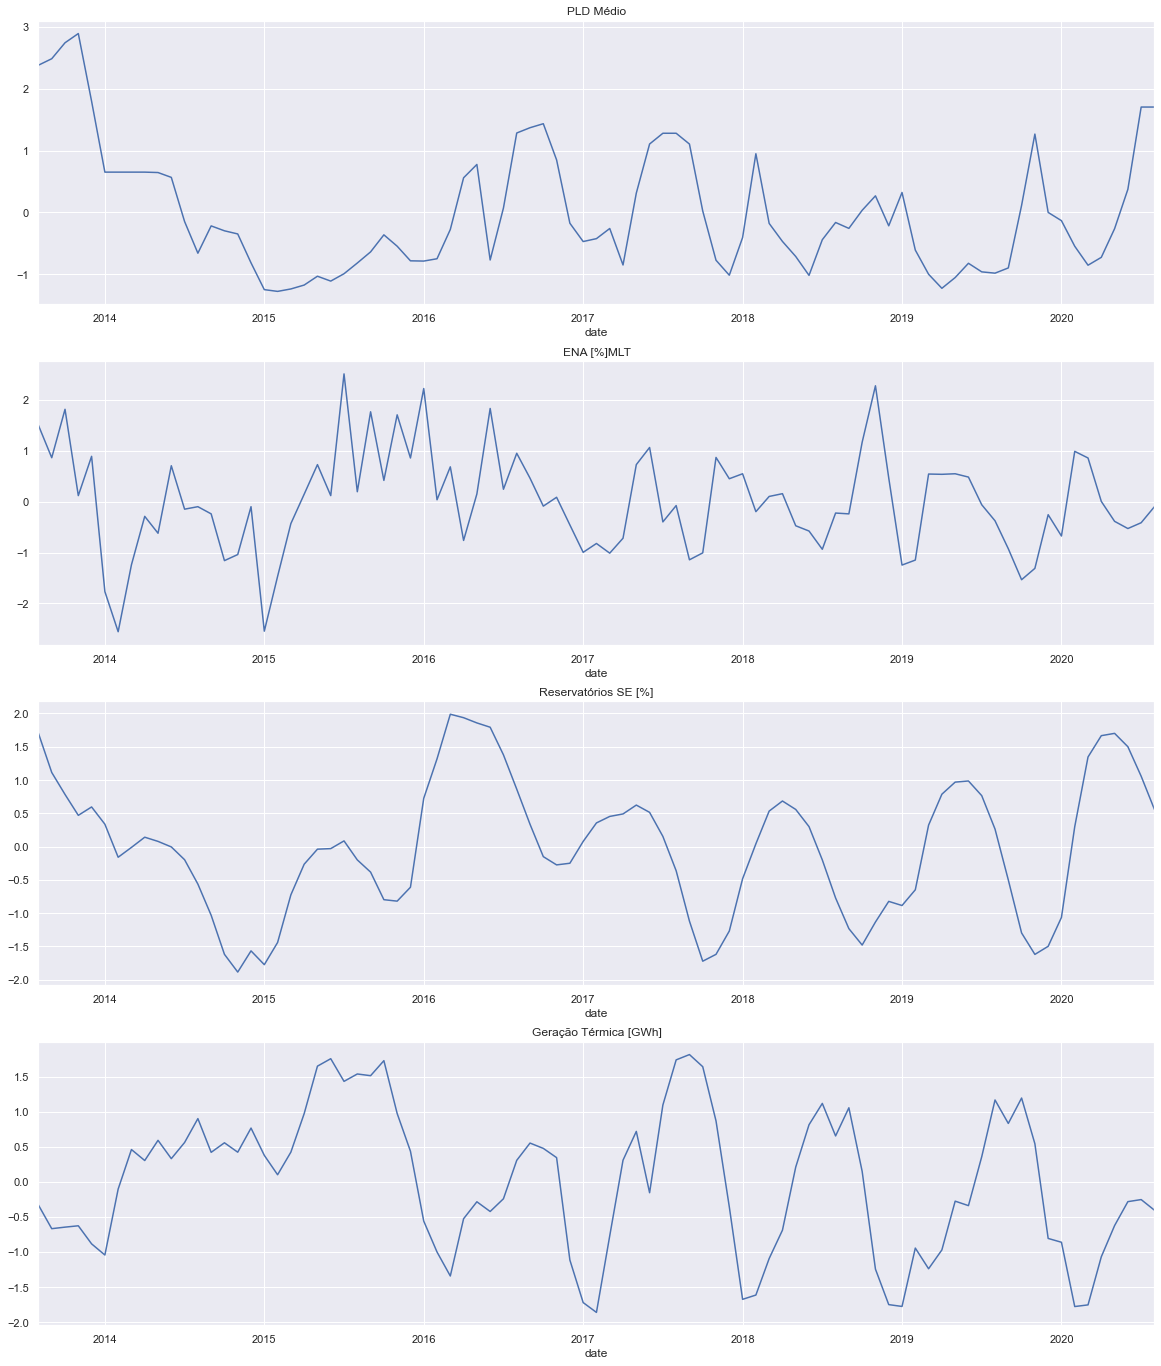

In [8]:
pld = (pld - pld_avg) / pld_dev
ena = (ena - ena_avg) / ena_dev
res = (res - res_avg) / res_dev
ter = (ter - ter_avg) / ter_dev

fig, axs = plt.subplots(4, figsize = (20, 24))

pld.plot(ax=axs[0], title = 'PLD Médio')
ena.plot(ax=axs[1], title = 'ENA [%]MLT')
res.plot(ax=axs[2], title = 'Reservatórios SE [%]')
ter.plot(ax=axs[3],  title = 'Geração Térmica [GWh]')

#pld.plot(figsize = (15,3))

# Remoção de Tendência

<AxesSubplot:title={'center':'Geração Térmica [GWh]'}, xlabel='date'>

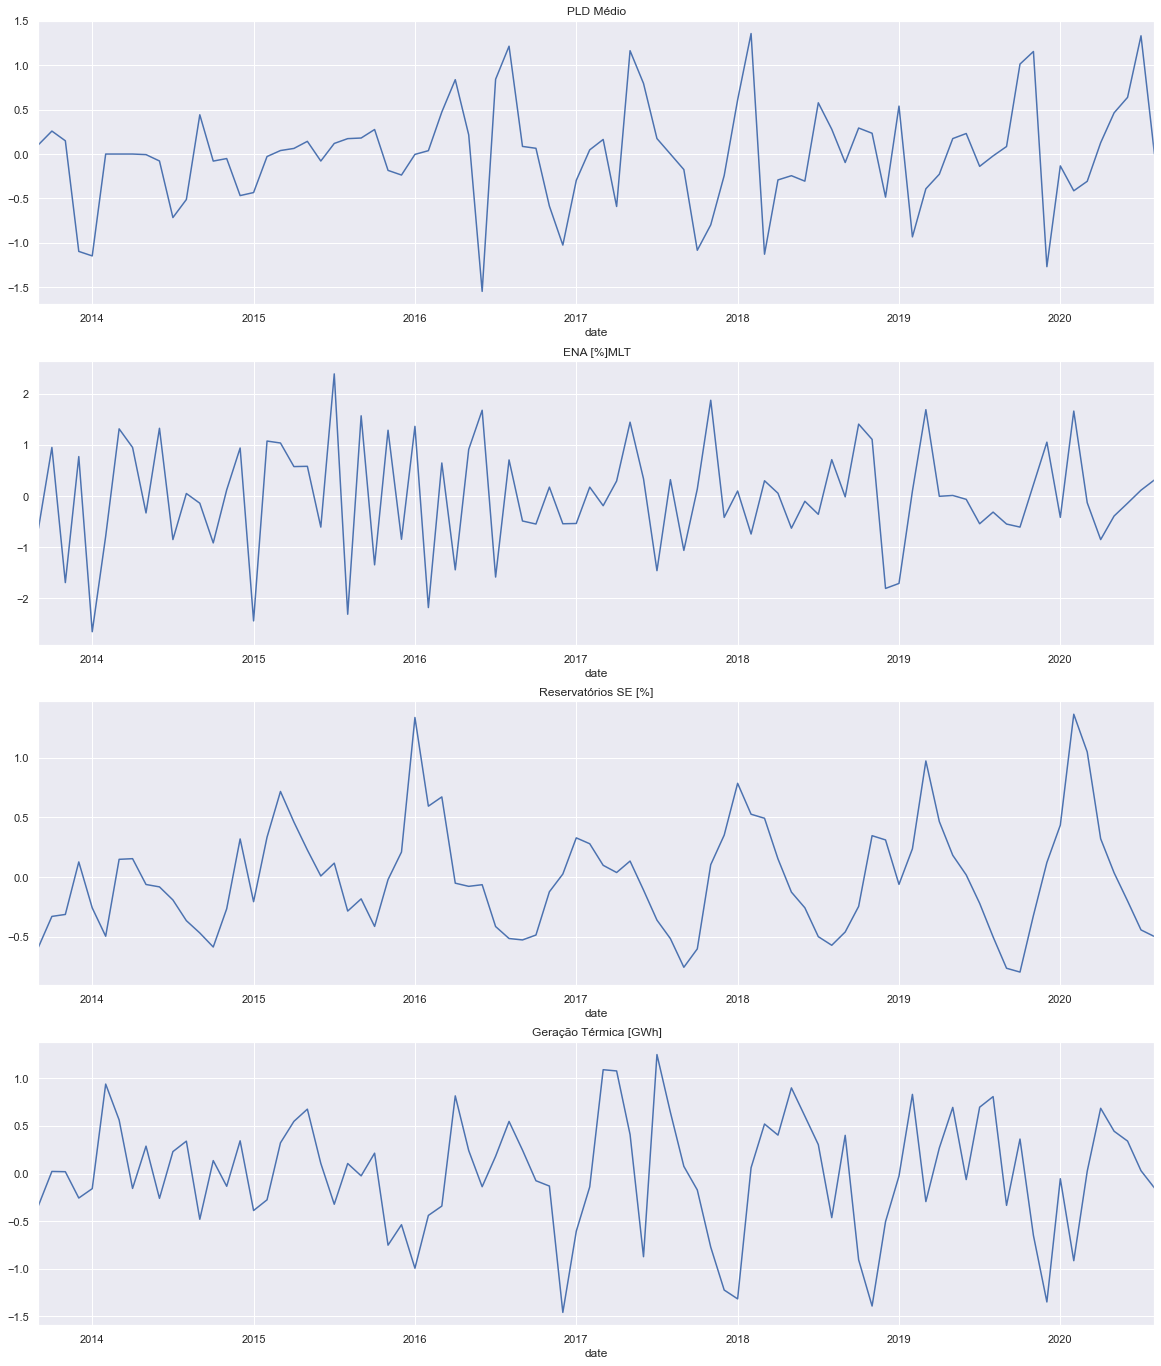

In [9]:
pld = pld.diff().dropna()
ena = ena.diff().dropna()
res = res.diff().dropna()
ter = ter.diff().dropna()

fig2, axs2 = plt.subplots(4, figsize = (20, 24))

pld.plot(ax=axs2[0], title = 'PLD Médio')
ena.plot(ax=axs2[1], title = 'ENA [%]MLT')
res.plot(ax=axs2[2], title = 'Reservatórios SE [%]')
ter.plot(ax=axs2[3],  title = 'Geração Térmica [GWh]')

# Remoção de Volatilidade

In [10]:
pld_annual_volatility = pld.groupby(pld.index.year).std()
ena_annual_volatility = ena.groupby(ena.index.year).std()
res_annual_volatility = res.groupby(res.index.year).std()
ter_annual_volatility = ter.groupby(ter.index.year).std()

#pld_annual_volatility

In [11]:
pld_annual_vol = pld.index.map(lambda d: pld_annual_volatility.loc[d.year])
ena_annual_vol = ena.index.map(lambda d: ena_annual_volatility.loc[d.year])
res_annual_vol = res.index.map(lambda d: res_annual_volatility.loc[d.year])
ter_annual_vol = ter.index.map(lambda d: ter_annual_volatility.loc[d.year])

#pld_annual_vol

<AxesSubplot:title={'center':'Geração Térmica [GWh]'}, xlabel='date'>

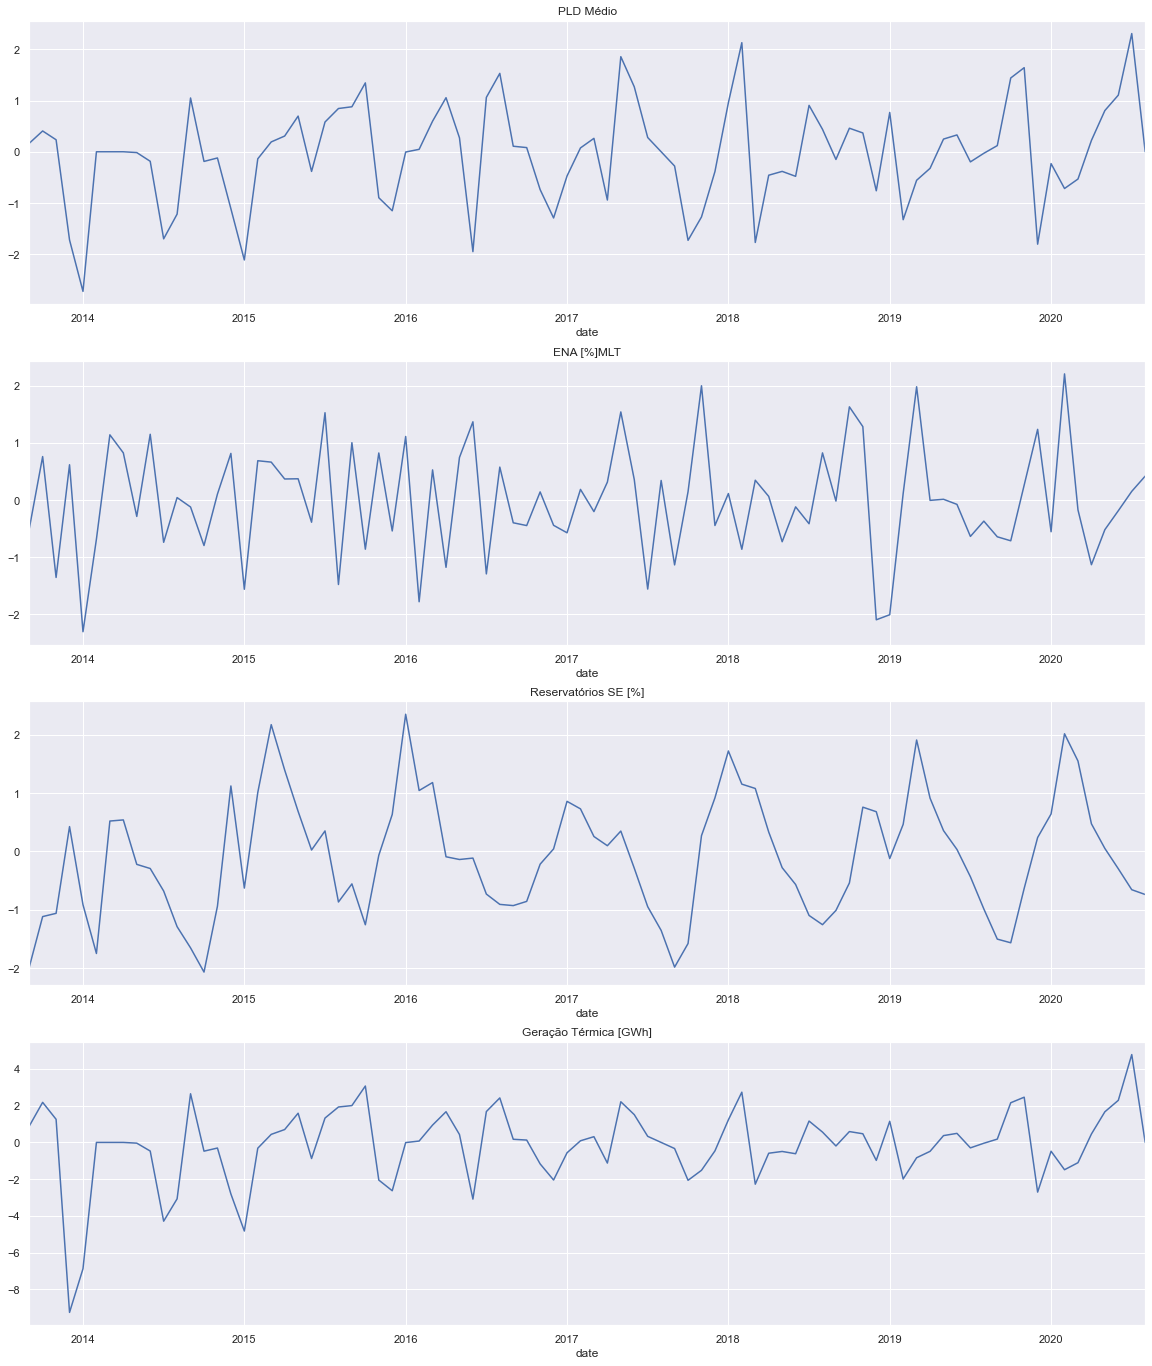

In [12]:
pld = pld / pld_annual_vol
ena = ena / ena_annual_vol
res = res / res_annual_vol
ter = pld / ter_annual_vol

fig3, axs3 = plt.subplots(4, figsize = (20, 24))

pld.plot(ax=axs3[0], title = 'PLD Médio')
ena.plot(ax=axs3[1], title = 'ENA [%]MLT')
res.plot(ax=axs3[2], title = 'Reservatórios SE [%]')
ter.plot(ax=axs3[3],  title = 'Geração Térmica [GWh]')

# Remoção de Sazonalidade

In [13]:
pld_month_averages = pld.groupby(pld.index.month).mean()
ena_month_averages = ena.groupby(ena.index.month).mean()
res_month_averages = res.groupby(res.index.month).mean()
ter_month_averages = ter.groupby(pld.index.month).mean()

#month_avgs.head(12)

In [14]:
pld_month_avg = pld.index.map(lambda d: pld_month_averages.loc[d.month])
ena_month_avg = ena.index.map(lambda d: ena_month_averages.loc[d.month])
res_month_avg = res.index.map(lambda d: res_month_averages.loc[d.month])
ter_month_avg = ter.index.map(lambda d: ter_month_averages.loc[d.month])

#pld_month_avg

<AxesSubplot:title={'center':'Geração Térmica [GWh]'}, xlabel='date'>

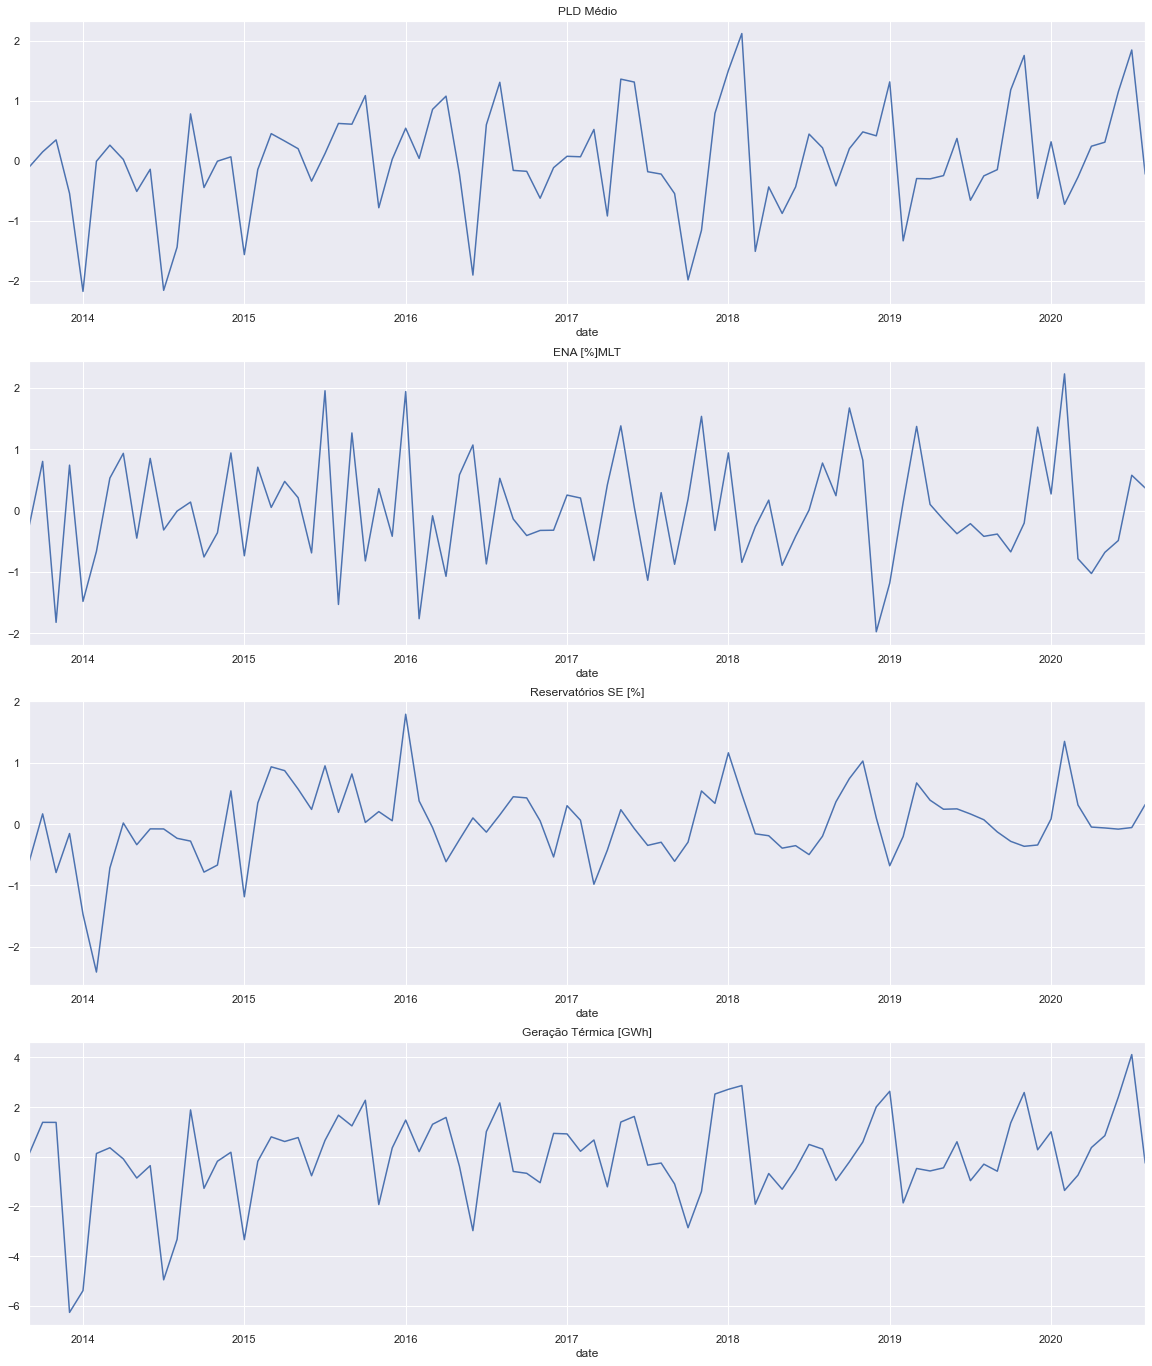

In [15]:
pld = pld - pld_month_avg
ena = ena - ena_month_avg
res = res - res_month_avg
ter = ter - ter_month_avg

fig4, axs4 = plt.subplots(4, figsize = (20, 24))

pld.plot(ax=axs4[0], title = 'PLD Médio')
ena.plot(ax=axs4[1], title = 'ENA [%]MLT')
res.plot(ax=axs4[2], title = 'Reservatórios SE [%]')
ter.plot(ax=axs4[3],  title = 'Geração Térmica [GWh]')

# Testes de Raíz Unitária Augmented Dickey-Fuller e Phillips-Perron

In [16]:
from statsmodels.tsa.stattools import adfuller
import arch.unitroot as at

adf_pld = adfuller(pld)
adf_ena = adfuller(ena)
adf_res = adfuller(res)
adf_ter = adfuller(ter)

pp_pld = at.PhillipsPerron(pld, test_type='tau')
pp_ena = at.PhillipsPerron(ena, test_type='tau')
pp_res = at.PhillipsPerron(res, test_type='tau')
pp_ter = at.PhillipsPerron(ter, test_type='tau')

print('PLD Médio (t+12)')
print('\nADF Statistic: %f' % adf_pld[0])
print('p-value: %f' % adf_pld[1])
print('Critical Values:')
for key, value in adf_pld[4].items():
    print('\t%s: %.3f' % (key, value))
print('\n',pp_pld)
print('\n-----------------\n')
print('ENA [%]MLT')
print('\nADF Statistic: %f' % adf_ena[0])
print('p-value: %f' % adf_ena[1])
print('Critical Values:')
for key, value in adf_ena[4].items():
    print('\t%s: %.3f' % (key, value))
print('\n',pp_ena)
print('\n-----------------\n')
print('Reservatórios SE (%)')
print('\nADF Statistic: %f' % adf_res[0])
print('p-value: %f' % adf_res[1])
print('Critical Values:')
for key, value in adf_res[4].items():
    print('\t%s: %.3f' % (key, value))
print('\n',pp_res)
print('\n-----------------\n')
print('Geração Térmica (GWh)')
print('\nADF Statistic: %f' % adf_ter[0])
print('p-value: %f' % adf_ter[1])
print('Critical Values:')
for key, value in adf_ter[4].items():
    print('\t%s: %.3f' % (key, value))
print('\n',pp_ter)

PLD Médio (t+12)

ADF Statistic: -6.207052
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586

      Phillips-Perron Test (Z-tau)    
Test Statistic                 -7.391
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.51 (1%), -2.90 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

-----------------

ENA [%]MLT

ADF Statistic: -6.199987
p-value: 0.000000
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587

      Phillips-Perron Test (Z-tau)    
Test Statistic                -15.401
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.51 (1%), -2.90 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

-------------

In [23]:
df_final = pd.DataFrame()

df_final['pld (t+12) I(1)'] = pld
#df_final['ena I(1)'] = ena
df_final['reservatorios SE I(1)'] = res
df_final['termica I(1)'] = ter

df_final.head(5)

,pld (t+12) I(1),reservatorios SE I(1),termica I(1)
date,,,
2013-09,-0.105825,-0.611546,0.117471
2013-10,0.146596,0.166260,1.381830
2013-11,0.346505,-0.790480,1.379644
2013-12,-0.545893,-0.154545,-6.268730
2014-01,-2.179236,-1.470412,-5.392660


In [26]:
from statsmodels.tsa.api import VAR

var = VAR(df_final)
var_order = var.select_order(maxlags=5)
var_order.summary()

,AIC,BIC,FPE,HQIC
0,-2.750,-2.660*,0.06391,-2.714
1,-2.891,-2.532,0.05551,-2.747*
2,-2.921*,-2.292,0.05393*,-2.669
3,-2.746,-1.846,0.06445,-2.385
4,-2.686,-1.517,0.06874,-2.218
5,-2.788,-1.348,0.06260,-2.211


In [28]:
from statsmodels.tsa.api import VAR

var_fit = var.fit(maxlags=2)
var_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 04, Dec, 2021
Time:                     17:01:29
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.36353
Nobs:                     82.0000    HQIC:                  -1.73243
Log likelihood:          -246.884    FPE:                   0.138258
AIC:                     -1.97988    Det(Omega_mle):        0.108134
--------------------------------------------------------------------
Results for equation pld (t+12) I(1)
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                           -0.006894         0.091536           -0.075           0.940
L1.pld (t+12) I(1)              -0.333000         0.238372           -1.397           0.162
L1.res

In [73]:
import statsmodels.tsa.stattools as ts
import numpy as np

coint_test = ts.coint(df_final['termica I(1)'], df_final['pld (t+12) I(1)'])

print('Augmented Engle-Granger two-step cointegration test')
print('The t-statistic on residuals: %f' % coint_test[0])
print('p-value: %f' % coint_test[1])
print('Critical Values:')
d = dict(enumerate(coint_test[2].flatten(), 1))
for key, value in d.items():
    print('\t%s: %.3f' % (key, value))

Augmented Engle-Granger two-step cointegration test
The t-statistic on residuals: -7.734571
p-value: 0.000000
Critical Values:
	1: -4.033
	2: -3.411
	3: -3.096


In [74]:
import statsmodels.api as sm

Y = df_final['pld (t+12) I(1)']
#X = df_final.drop(['pld (t+12) I(1)',], axis=1)
X = df_final['termica I(1)']
X = sm.add_constant(X)

reg_model = sm.OLS(Y,X)
reg_results = reg_model.fit() 
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:        pld (t+12) I(1)   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     345.6
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           3.84e-31
Time:                        21:30:17   Log-Likelihood:                -38.395
No. Observations:                  84   AIC:                             80.79
Df Residuals:                      82   BIC:                             85.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.645e-17      0.042  -6.27e-16   

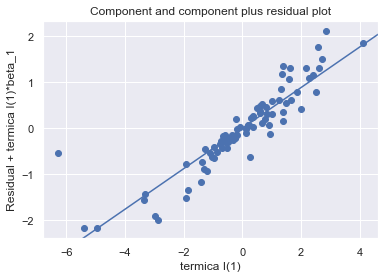

In [93]:
fig = sm.graphics.plot_ccpr(reg_results, "termica I(1)")
fig;

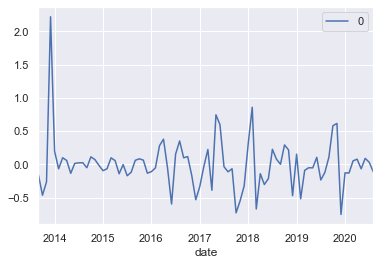

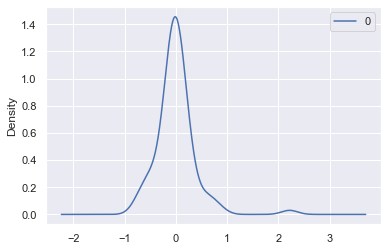

                  0
count  8.400000e+01
mean   3.469447e-18
std    3.844783e-01
min   -7.504440e-01
25%   -1.348932e-01
50%   -3.258265e-02
75%    1.016773e-01
max    2.217281e+00


In [34]:
from pandas import DataFrame

residuals = DataFrame(reg_results.resid)

residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()

print(residuals.describe())

# Testes de Causalidade de Granger

### Teste de Causalidade de Granger para a Variável ENA I(1)

In [20]:
#Teste de Causalidade de Granger para a Variável ENA I(1)
from statsmodels.tsa.stattools import grangercausalitytests

df_gc_ena = pd.DataFrame()

df_gc_ena['pld (t+12) I(1)'] = df_final['pld (t+12) I(1)']
df_gc_ena['ena I(1)'] = df_final['ena I(1)']

gc_ena = grangercausalitytests(df_gc_ena, 13)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0157  , p=0.9006  , df_denom=80, df_num=1
ssr based chi2 test:   chi2=0.0163  , p=0.8985  , df=1
likelihood ratio test: chi2=0.0163  , p=0.8985  , df=1
parameter F test:         F=0.0157  , p=0.9006  , df_denom=80, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2698  , p=0.7642  , df_denom=77, df_num=2
ssr based chi2 test:   chi2=0.5746  , p=0.7503  , df=2
likelihood ratio test: chi2=0.5726  , p=0.7510  , df=2
parameter F test:         F=0.2698  , p=0.7642  , df_denom=77, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6838  , p=0.5647  , df_denom=74, df_num=3
ssr based chi2 test:   chi2=2.2455  , p=0.5230  , df=3
likelihood ratio test: chi2=2.2149  , p=0.5290  , df=3
parameter F test:         F=0.6838  , p=0.5647  , df_denom=74, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5282  , p=0.7154  , df_d

### Teste de Causalidade de Granger para a Variável Reservatórios SE I(1)

In [21]:
#Teste de Causalidade de Granger para a Variável Reservatórios SE I(1)
from statsmodels.tsa.stattools import grangercausalitytests

df_gc_res = pd.DataFrame()

df_gc_res['pld (t+12) I(1)'] = df_final['pld (t+12) I(1)']
df_gc_res['reservatorios SE I(1)'] = df_final['reservatorios SE I(1)']

gc_res = grangercausalitytests(df_gc_res, 13)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8448  , p=0.1782  , df_denom=80, df_num=1
ssr based chi2 test:   chi2=1.9140  , p=0.1665  , df=1
likelihood ratio test: chi2=1.8922  , p=0.1690  , df=1
parameter F test:         F=1.8448  , p=0.1782  , df_denom=80, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8042  , p=0.1715  , df_denom=77, df_num=2
ssr based chi2 test:   chi2=3.8428  , p=0.1464  , df=2
likelihood ratio test: chi2=3.7555  , p=0.1529  , df=2
parameter F test:         F=1.8042  , p=0.1715  , df_denom=77, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5019  , p=0.2211  , df_denom=74, df_num=3
ssr based chi2 test:   chi2=4.9319  , p=0.1769  , df=3
likelihood ratio test: chi2=4.7876  , p=0.1880  , df=3
parameter F test:         F=1.5019  , p=0.2211  , df_denom=74, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5943  , p=0.1853  , df_d

### Teste de Causalidade de Granger para a Variável Geração Térmica I(1)

In [22]:
#Teste de Causalidade de Granger para a Variável Geração Térmica I(1)
from statsmodels.tsa.stattools import grangercausalitytests

df_gc_ter = pd.DataFrame()

df_gc_ter['pld (t+12) I(1)'] = df_final['pld (t+12) I(1)']
df_gc_ter['termica I(1)'] = df_final['termica I(1)']

gc_ter = grangercausalitytests(df_gc_ter, 13)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6513  , p=0.0117  , df_denom=80, df_num=1
ssr based chi2 test:   chi2=6.9007  , p=0.0086  , df=1
likelihood ratio test: chi2=6.6288  , p=0.0100  , df=1
parameter F test:         F=6.6513  , p=0.0117  , df_denom=80, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5787  , p=0.0326  , df_denom=77, df_num=2
ssr based chi2 test:   chi2=7.6222  , p=0.0221  , df=2
likelihood ratio test: chi2=7.2885  , p=0.0261  , df=2
parameter F test:         F=3.5787  , p=0.0326  , df_denom=77, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7087  , p=0.0512  , df_denom=74, df_num=3
ssr based chi2 test:   chi2=8.8949  , p=0.0307  , df=3
likelihood ratio test: chi2=8.4396  , p=0.0377  , df=3
parameter F test:         F=2.7087  , p=0.0512  , df_denom=74, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5779  , p=0.0446  , df_d